<a href="https://colab.research.google.com/github/Geckomonc/FundamentosDatos/blob/main/sesiones_practicas/sc_3_Geraldine_Acevedo_Restrepo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="imgs\banner_fcd.jpg" alt="bannersp" width="1100"  height="150">

## <span style="color:#2F749F;"><strong>📦 Sesión práctica 3: Análisis Multivariado</strong></span>
---
<p align="right">
  <a href="https://github.com/mariabda2/intro_data_2025/blob/main/sesiones_practicas/sp_3_maria_bernarda_salazar.ipynb?clone=true" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
  </a>
</p>


## <span style="color:black;"><strong>Datos del estudiante</strong></span>

In [ ]:
# Solicitar datos al estudiante
nombre = input("Ingresa tu nombre completo: ")
correo = input("Ingresa tu correo electrónico: ")

# Mostrar los datos ingresados
print("\nResumen de datos ingresados:")
print(f"Nombre: {nombre}")
print(f"Correo electrónico: {correo}")

Ingresa tu nombre completo: Geraldine Acevedo Restrepo
Ingresa tu correo electrónico: geraldine.acevedo@udea.edu.co

Resumen de datos ingresados:
Nombre: Geraldine Acevedo Restrepo
Correo electrónico: geraldine.acevedo@udea.edu.co


## <span style="color:black;"><strong>Parte 3: Análisis Multivariado</strong></span>

### <span style="color:#2F749F;"><strong>Ejercicio1: Análisis de componentes principales</strong></span>

A partir de un conjunto de datos real sobre pingüinos antárticos, realiza un análisis multivariado utilizando PCA para reducir la dimensionalidad y visualizar agrupamientos por especie.

1. Carga el conjunto de datos penguins desde la librería seaborn `load_dataset("penguins")`.
2. Selecciona las siguientes variables morfológicas para el análisis:
   - 'bill_length_mm'
   - 'bill_depth_mm'
   - 'flipper_length_mm'
   - 'body_mass_g'
3. Estandariza las variables seleccionadas usando StandardScaler.
4. Aplica PCA()
5. Imprime las ecuaciones que obtuviste para el número de componentes que utilizaste
6. Grafica los resultados en un plano bidimensional (PC1 vs PC2), diferenciando por especie (ver imagen).
7. Interpreta visualmente qué especies se agrupan o separan mejor en el espacio reducido.

<p align="center">
    <img src="imgs\sp_3_e1.png" alt="sp_3_e1" width="600"  height="400">
</p>


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
# 1) Cargar datos reales
penguins = sns.load_dataset("penguins")

In [10]:
# 2) Variables morfológicas
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
df = penguins[['species'] + features].dropna().reset_index(drop=True)
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0


In [11]:
# 3) Estandarizar
X = df[features].values
scaler = StandardScaler()
Xz = scaler.fit_transform(X)

In [12]:
# 4) PCA
pca = PCA(n_components=2, random_state=0)
Z = pca.fit_transform(Xz)

In [14]:
# 5) Imprimir las ecuaciones de las componentes
means = scaler.mean_
stds  = scaler.scale_
load  = pca.components_

print("Ecuaciones (las variables están estandarizadas):")
vars_std = [f"({v} - {m:.3f})/{s:.3f}" for v,m,s in zip(features,means,stds)]
for k,ck in enumerate(load, start=1):
    eq = " + ".join([f"{coef:+.3f}*{term}" for coef,term in zip(ck,vars_std)])
    print(f"PC{k} = {eq}")
print("\nVarianza explicada:", np.round(pca.explained_variance_ratio_, 3))

Ecuaciones (las variables están estandarizadas):
PC1 = +0.455*(bill_length_mm - 43.922)/5.452 + -0.400*(bill_depth_mm - 17.151)/1.972 + +0.576*(flipper_length_mm - 200.915)/14.041 + +0.548*(body_mass_g - 4201.754)/800.781
PC2 = +0.597*(bill_length_mm - 43.922)/5.452 + +0.798*(bill_depth_mm - 17.151)/1.972 + +0.002*(flipper_length_mm - 200.915)/14.041 + +0.084*(body_mass_g - 4201.754)/800.781

Varianza explicada: [0.688 0.193]


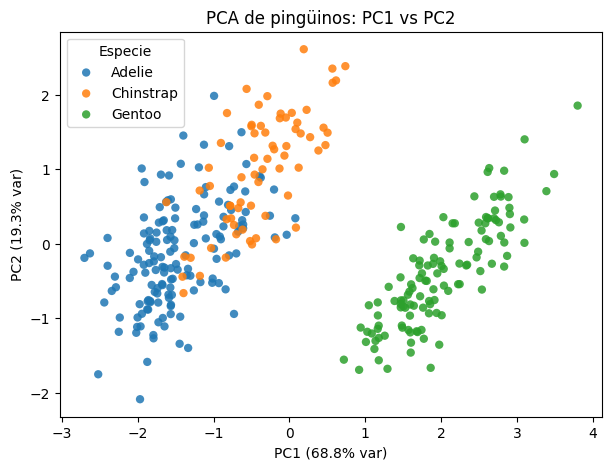

In [15]:


# 6) Gráfico PC1 vs PC2 coloreado por especie
pcadf = pd.DataFrame({"PC1": Z[:,0], "PC2": Z[:,1], "species": df["species"]})
fig, ax = plt.subplots(figsize=(7,5))
for sp, sub in pcadf.groupby("species"):
    ax.scatter(sub.PC1, sub.PC2, alpha=0.85, label=str(sp), edgecolors="none")
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
ax.set_title("PCA de pingüinos: PC1 vs PC2")
ax.legend(title="Especie")
plt.show()

### <span style="color:#2F749F;"><strong>Ejercicio 2: Regresión Lineal Múltiple</strong></span>  

A partir de un conjunto de datos real sobre diamantes, realiza un análisis de regresión lineal múltiple para predecir el precio en función de variables numéricas relacionadas con sus características físicas.  

1. Carga el conjunto de datos `diamonds` desde la librería seaborn `load_dataset("diamonds")`.  
2. Selecciona las siguientes variables predictoras para el análisis:  
   - `carat`  
   - `depth`  
   - `table`  
   - `x`  
   - `y`  
   - `z`  
3. Define como variable respuesta el precio (`price`).  
4. Divide los datos en entrenamiento y prueba para validar el modelo.  
5. Ajusta un modelo de **Regresión Lineal Múltiple** usando `statsmodels.OLS()`.  
6. Imprime el resumen del modelo (coeficientes, significancia, R² ajustado, etc.).  
7. Evalúa el desempeño del modelo con métricas de ajuste como **RMSE** y **R²** en el conjunto de prueba.  
8. Grafica los valores reales vs. los valores predichos del precio para interpretar la calidad del ajuste.  

<p align="center">
    <img src="imgs\sp_3_e2.png" alt="sp_3_e2" width="600"  height="400">
</p>



- Linealidad
- Independencia
- Normalidad
- Homocedasticidad
- Multicolinealidad

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar datos
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.dropna()

# Mostrar primeras filas
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
# Variables independientes (X) y dependiente (Y)
X = diamonds[['carat', 'depth', 'table','x','y','z']]
Y = diamonds['price']

In [18]:
from sklearn.model_selection import train_test_split
# Dividir en conjunto de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Mostrar dimensiones de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (43152, 6)
Tamaño del conjunto de prueba: (10788, 6)


In [19]:
# 3. Ajustar el modelo de regresión lineal múltiple con statsmodels
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()


In [20]:
# 4. Imprimir resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 4.391e+04
Date:                Fri, 12 Sep 2025   Prob (F-statistic):               0.00
Time:                        00:02:12   Log-Likelihood:            -3.7672e+05
No. Observations:               43152   AIC:                         7.534e+05
Df Residuals:                   43145   BIC:                         7.535e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.098e+04    497.170     42.192      0.0

Evaluemos linealidad

In [21]:
# 5. Evaluar el modelo en el conjunto de prueba
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)
# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

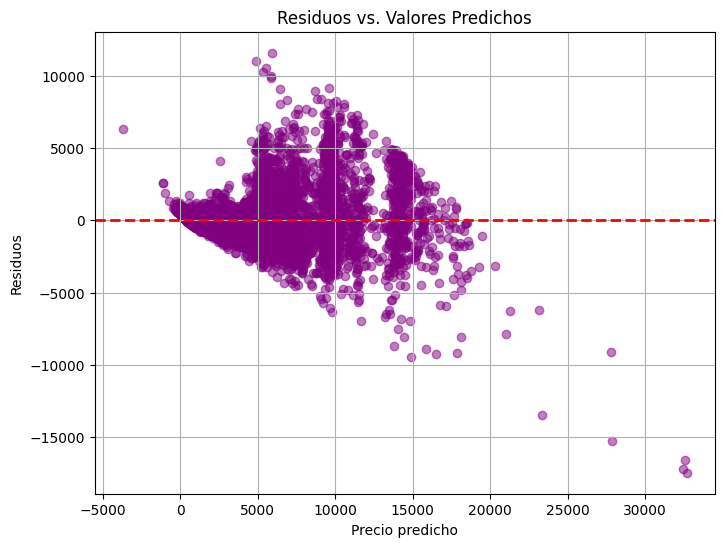

In [22]:
# Gráfico de residuos vs. valores predichos
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Precio predicho")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores Predichos")
plt.grid(True)
plt.show()


- La relaciòn no parece lineal porque parece formar un patròn, como una lìnea curva hacia abajo.

Calculando Independencia

Se hace evaluaciòn de Durbin-Watson: evalúa autocorrelación en los residuos (valor cercano a 2 indica independencia; valores <1 o >3 sugieren autocorrelación).
Durbin-Watson:                   1.989

Segùn este resultado tendrìamos residuos independientes


Calculando homocedasticidad

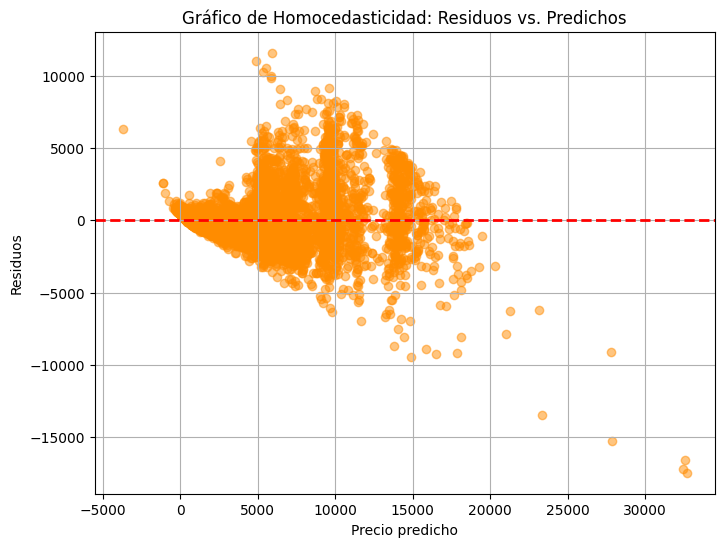

In [23]:
# Calcular residuos
residuals = y_test - y_pred

# Gráfico de residuos vs. valores predichos
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5, color='darkorange')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Precio predicho")
plt.ylabel("Residuos")
plt.title("Gráfico de Homocedasticidad: Residuos vs. Predichos")
plt.grid(True)
plt.show()

Tiene forma de cono o embudo y los valores parecen concentrarse en los precios màs bajos.

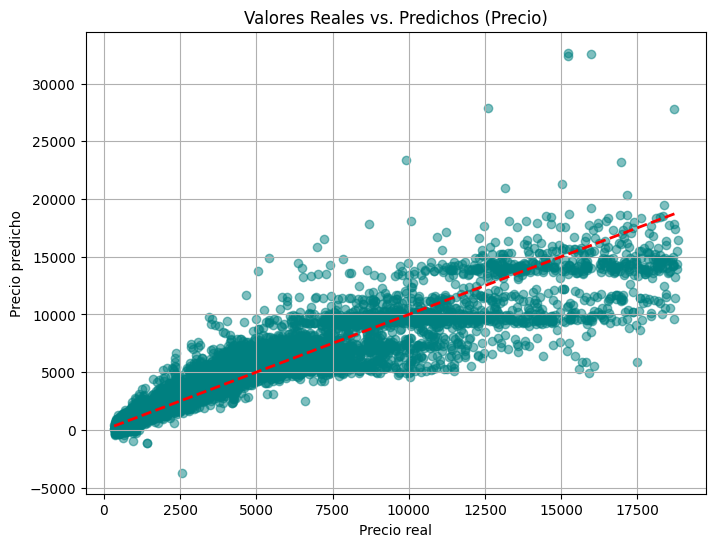

In [24]:
# 6. Graficar valores reales vs. valores predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Valores Reales vs. Predichos (Precio)")
plt.grid(True)
plt.show()